<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Kannada/ULMFiT_Kannada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv('/content/kannada_sentiment_full_train.tsv', sep="\t")
train

,text,category
0,ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...,Negative
1,ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...,Positive
2,Super sar song,not-Kannada
3,Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...,Negative
4,Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....,Positive
...,...,...
6207,@A.R.W tumbad tanhaji andhadhun aise bahot h...,not-Kannada
6208,പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്,not-Kannada
6209,Bro...nNeen este Roast madudru...China ne beku...,Negative
6210,ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...,Positive


In [36]:
val=pd.read_csv('/content/kannada_sentiment_full_test_withlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Kan_1,ಈ ಹಾಡನ್ನು ಹಾಡಿದ ವಿಜಯ ಪ್ರಕಾಶ voice ಯಾರಿಗೆಲ್ಲಾ ಇ...,Positive
1,Kan_2,Jai D Boss,unknown state
2,Kan_3,Signature move,not-Kannada
3,Kan_4,Super song bro,Positive
4,Kan_5,Wow Super agi helidira sir,Positive
...,...,...,...
763,Kan_764,Thu thukali trailer,unknown state
764,Kan_765,Siri gannadam galge haakbitallapa Thu yaro ni...,Negative
765,Kan_766,ನಾವೇನಾದರು ಸ್ವಾಬಿಮಾನಿಯಾಗಿ ಬದುಕನ್ನು ಕಟ್ಟಿಕೊಳ್ಳಲು...,Positive
766,Kan_767,ದಿಯಾ ನೀವು ಸೋಷಿಯಲ್ ಮೀಡಿಯಾ ಅಲ್ಲಿ ಕಾಣ್ತಿಲ್ಲ.nದಯವಿ...,unknown state


In [37]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [38]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [39]:
punc(df)
punc(df_test)

            category                                               text
0           Negative  ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...
1           Positive  ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...
2        not-Kannada                                     Super sar song
3           Negative  Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...
4           Positive                          Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....
...              ...                                                ...
6207     not-Kannada  A.R.W   tumbad tanhaji andhadhun aise bahot ha...
6208     not-Kannada                  പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്
6209        Negative  Bro...nNeen este Roast madudru...China ne beku...
6210        Positive  ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...
6211  Mixed feelings                                         26 M Views

[6212 rows x 2 columns]
           category                                               text
0          Positive  ಈ ಹಾಡನ್ನು ಹಾಡಿದ ವಿಜ

In [40]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [41]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [42]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (6212 items)
x: LMTextList
xxbos ಒಂದು ದೇಶದ xxunk ಅದರ xxunk xxunk xxunk . ಅವರು xxunk ಎಷ್ಟು xxunk xxunk xxunk . ಭಾರತದಲ್ಲಿ xxunk ಇದೆ ಆ xxunk ಅವರ xxunk,xxbos ಕನ್ನಡದಲ್ಲಿ xxunk xxunk xxunk xxunk ಸಬ್ಸ್ಕ್ರೈಬ್ ಮಾಡಿ ನಮ್ಮ xxunk,xxbos xxmaj super sar song,xxbos xxmaj tiktokers present xxunk ... xxunk ಯಾರು ನಮ್ಮ xxunk,xxbos xxmaj super ಸಾಂಗ್ ವೆರಿ ನೈಸ್ xxrep 4 .
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (768 items)
x: LMTextList
xxbos ಈ ಹಾಡನ್ನು xxunk xxunk xxunk voice xxunk xxunk ಲೈಕ್ xxunk ಮಾತಿನ ಬಜಾರು ಸುದ್ದಿ ಸಾರಿದೆ xxrep 10 .,xxbos xxmaj jai d xxmaj boss,xxbos xxmaj signature move,xxbos xxmaj super song bro,xxbos xxmaj wow xxmaj super agi helidira sir
y: LMLabelList
,,,,
Path: .;

Test: None>

In [43]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-02
Min loss divided by 10: 1.58E-01


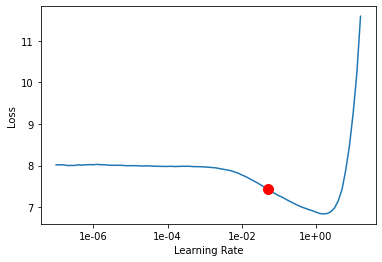

In [44]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [45]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.214153,4.577226,0.308594,00:05
1,5.228393,4.357794,0.339397,00:05


In [46]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.575411,4.420983,0.329799,00:07
1,4.275486,4.066617,0.355134,00:07
2,3.824004,4.131262,0.359152,00:07


In [47]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-02
Min loss divided by 10: 8.32E-03


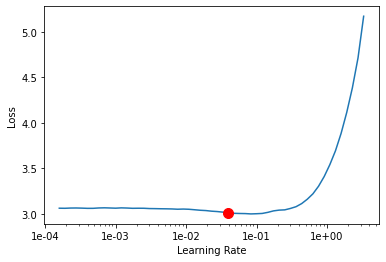

In [48]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [49]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.071656,4.130292,0.358259,00:05
1,2.933957,4.146489,0.355580,00:05
2,2.792560,4.155551,0.357366,00:05


In [50]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-02
Min loss divided by 10: 2.75E-03


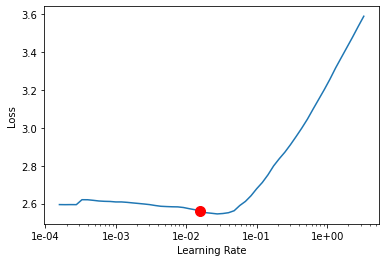

In [51]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [52]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.599149,4.268260,0.343638,00:05
1,2.492619,4.350216,0.342969,00:05
2,2.374735,4.361207,0.346205,00:05


In [53]:
#save the encoder model
learn.save_encoder('my_encoder')

In [54]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [55]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6212 items)
x: TextList
xxbos ಒಂದು ದೇಶದ xxunk ಅದರ xxunk xxunk xxunk . ಅವರು xxunk ಎಷ್ಟು xxunk xxunk xxunk . ಭಾರತದಲ್ಲಿ xxunk ಇದೆ ಆ xxunk ಅವರ xxunk,xxbos ಕನ್ನಡದಲ್ಲಿ xxunk xxunk xxunk xxunk ಸಬ್ಸ್ಕ್ರೈಬ್ ಮಾಡಿ ನಮ್ಮ xxunk,xxbos xxmaj super sar song,xxbos xxmaj tiktokers present xxunk ... xxunk ಯಾರು ನಮ್ಮ xxunk,xxbos xxmaj super ಸಾಂಗ್ ವೆರಿ ನೈಸ್ xxrep 4 .
y: CategoryList
Negative,Positive,not-Kannada,Negative,Positive
Path: .;

Valid: LabelList (768 items)
x: TextList
xxbos ಈ ಹಾಡನ್ನು xxunk xxunk xxunk voice xxunk xxunk ಲೈಕ್ xxunk ಮಾತಿನ ಬಜಾರು ಸುದ್ದಿ ಸಾರಿದೆ xxrep 10 .,xxbos xxmaj jai d xxmaj boss,xxbos xxmaj signature move,xxbos xxmaj super song bro,xxbos xxmaj wow xxmaj super agi helidira sir
y: CategoryList
Positive,unknown state,not-Kannada,Positive,Positive
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(4640, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
   

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 2.51E-02


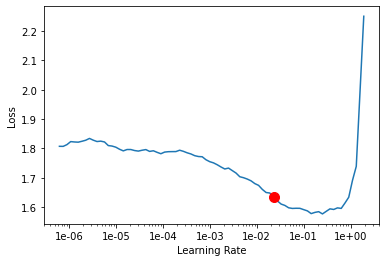

In [56]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [57]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.283718,1.045120,0.604167,0.420959,00:06
1,1.214051,1.035519,0.602865,0.000000,00:07
2,1.173312,1.020035,0.600260,0.514976,00:07


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

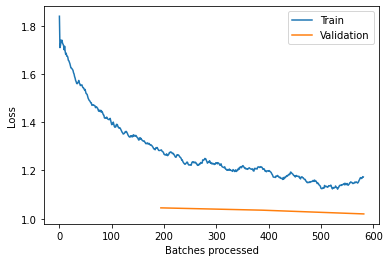

In [58]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-05
Min loss divided by 10: 8.32E-05


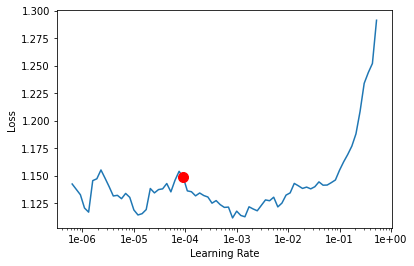

In [59]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [60]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.190259,1.020457,0.618490,0.433036,00:07
1,1.095293,0.998799,0.632812,0.509742,00:07


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05
Min loss divided by 10: 1.32E-07


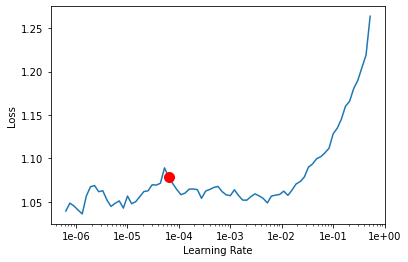

In [61]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [62]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.086182,0.982644,0.634115,0.483620,00:12
1,0.969202,0.984695,0.626302,0.486570,00:12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [63]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.948990,1.011640,0.613281,0.483841,00:16
1,0.773922,1.052330,0.602865,0.488451,00:16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.769172,1.107136,0.627604,0.489616,00:15
1,0.613059,1.193366,0.613281,0.486872,00:15


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.492101,1.214938,0.618490,0.495368,00:15
1,0.445810,1.263422,0.625000,0.500082,00:15
2,0.392379,1.290597,0.627604,0.506920,00:16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [64]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [65]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,9,9,12,0,4
1,15,95,37,3,3
2,26,44,279,18,22
3,8,1,34,79,13
4,7,8,12,10,20


In [66]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[  9   9  12   0   4]
 [ 15  95  37   3   3]
 [ 26  44 279  18  22]
 [  8   1  34  79  13]
 [  7   8  12  10  20]]
0.6276041666666666


In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.1385    0.2647    0.1818        34
           1     0.6051    0.6209    0.6129       153
           2     0.7460    0.7172    0.7313       389
           3     0.7182    0.5852    0.6449       135
           4     0.3226    0.3509    0.3361        57

    accuracy                         0.6276       768
   macro avg     0.5061    0.5078    0.5014       768
weighted avg     0.6547    0.6276    0.6389       768

